Student grades prediction

Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns

-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam
 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
•  https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [4]:
for column in df.columns:
    print(column)
    print('\n')
    print(df[column].value_counts())
    print('\n\n')

Seat No.


Seat No.
CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: count, Length: 571, dtype: int64



PH-121


PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64



HS-101


HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64



CY-105


CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64



HS-105/12


HS-105/12
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64



MT-111


MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     

In [5]:
df.shape

(571, 43)

In [6]:
df.drop(columns = ['Seat No.'],axis = 1,inplace = True)

In [7]:
df.loc[df['PH-121'] == '']

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


Checking null values

In [8]:
df.isna().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [9]:
df.dropna(axis = 0,inplace = True)

In [10]:
df.shape

(417, 42)

In [11]:
df.drop_duplicates()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


As there are no duplicate values

Multivariate Analysis

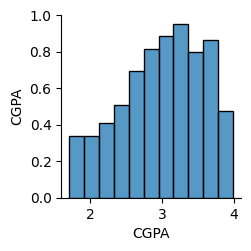

In [12]:
sns.pairplot(df)
plt.show()

We need to transform the values

In [13]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
for column in df.columns:
    df[column] = oe.fit_transform(df[[column]]).reshape(-1,1)

In [14]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,45.0
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,27.0
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,309.0
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,18.0
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,344.0
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,343.0
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,275.0
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,44.0


Check distribution

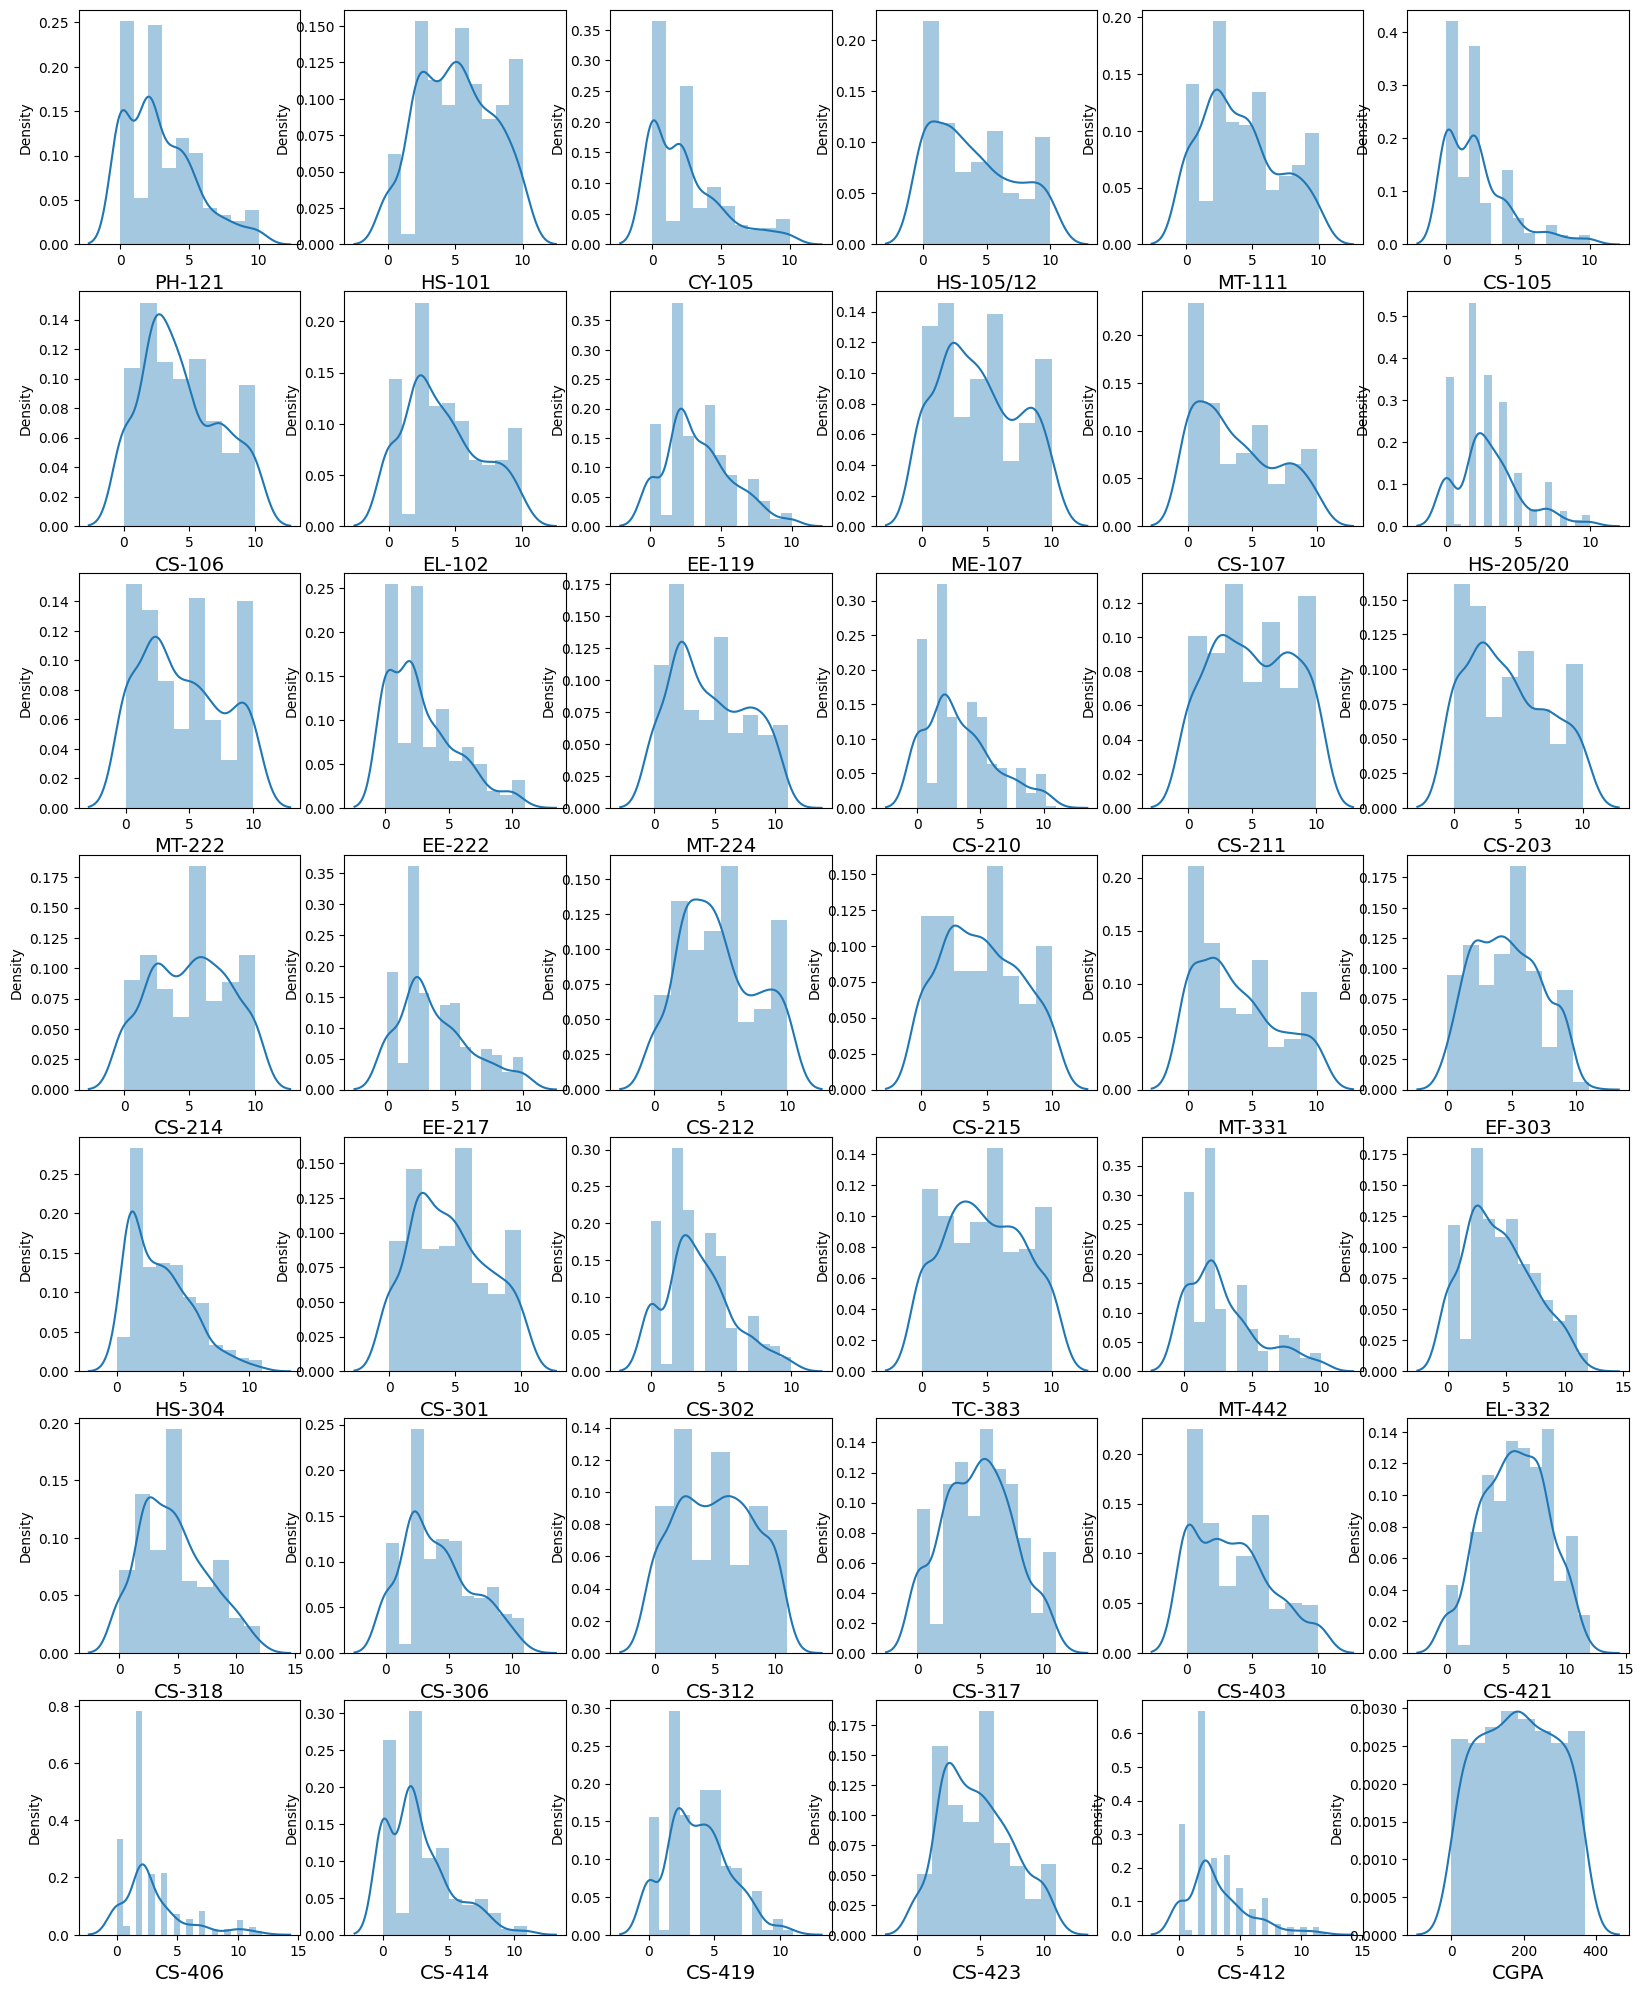

In [15]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 42:
        ax = plt.subplot(7,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 14)
    plotnumber += 1
plt.show()

In [16]:
df.skew()

PH-121       0.843038
HS-101       0.060501
CY-105       1.164895
HS-105/12    0.438328
MT-111       0.411455
CS-105       1.371544
CS-106       0.386504
EL-102       0.411208
EE-119       0.598484
ME-107       0.235172
CS-107       0.485827
HS-205/20    0.810168
MT-222       0.267556
EE-222       0.925986
MT-224       0.247421
CS-210       0.719584
CS-211       0.026390
CS-203       0.338503
CS-214      -0.023360
EE-217       0.725573
CS-212       0.287555
CS-215       0.162124
MT-331       0.522156
EF-303       0.165395
HS-304       0.845552
CS-301       0.240407
CS-302       0.576735
TC-383       0.078789
MT-442       0.980504
EL-332       0.384478
CS-318       0.441450
CS-306       0.465063
CS-312       0.021299
CS-317       0.074201
CS-403       0.529815
CS-421      -0.093903
CS-406       1.439930
CS-414       0.975134
CS-419       0.419932
CS-423       0.344021
CS-412       1.077441
CGPA         0.002756
dtype: float64

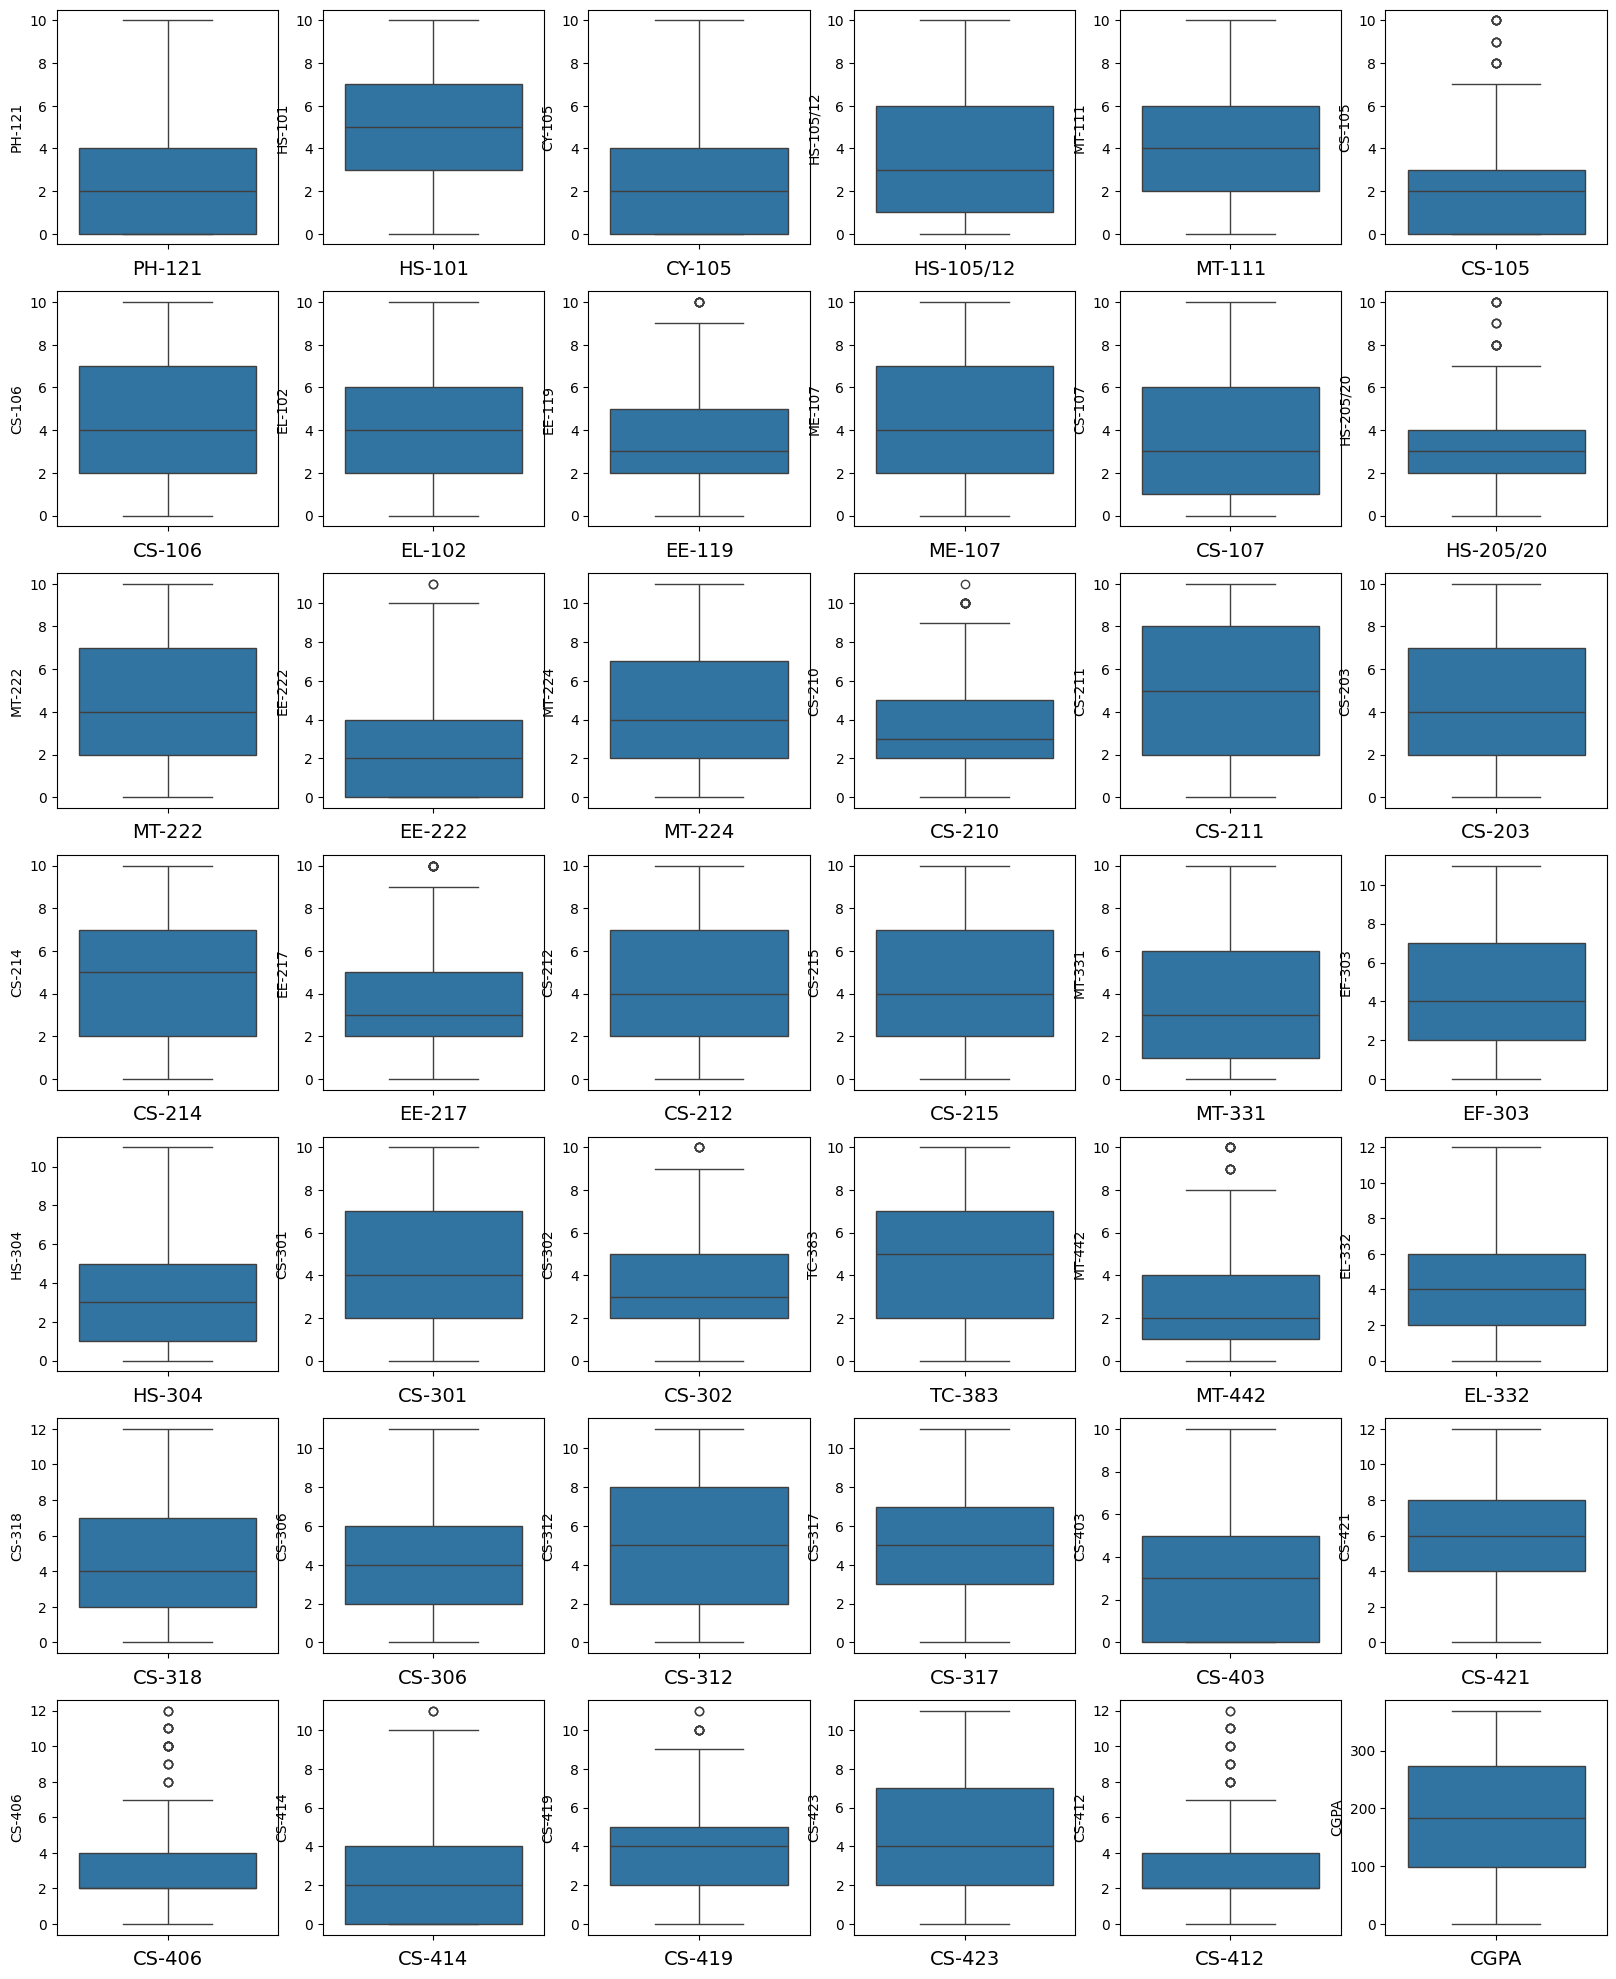

In [17]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 42:
        ax = plt.subplot(7,6,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize = 14)
    plotnumber += 1
plt.show()

In [18]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [19]:
for column in df.columns:
    df[column] = scaler.fit_transform(df[[column]]).reshape(-1,1)

In [20]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.929999,1.722942,1.583992,0.753575,1.264387,2.043319,1.434352,1.294449,0.742836,1.129062,...,0.938455,1.126920,1.335670,0.852924,-0.163727,-1.397996,1.609423,-0.572128,-0.283122,-1.385930
1,-1.408599,1.402865,1.815696,1.367363,0.456289,1.454907,1.434352,-1.693712,2.245406,1.373058,...,1.470592,1.444259,0.901910,1.218721,-0.163727,1.028556,0.943561,0.526419,0.161678,-1.638569
2,-1.408599,-0.699084,-1.186867,0.511870,0.142699,-1.259183,0.352182,0.142486,-0.498953,-0.694541,...,-0.563586,-0.595221,-1.409278,0.117176,-1.664513,-1.397996,-1.807685,-1.006608,-1.657296,1.127944
3,1.800926,0.742068,1.815696,1.367363,1.502401,0.310095,1.671436,1.294449,1.977842,0.873408,...,1.470592,0.469738,1.711182,0.852924,0.941100,0.397165,1.284288,0.848828,1.412835,-1.781187
4,-0.094494,-1.099528,0.253830,0.242872,-1.678218,-1.259183,-0.711570,0.142486,-1.764134,-0.694541,...,0.076052,-0.226658,0.379068,-0.253171,-0.163727,-1.397996,-0.664875,-1.006608,-1.657296,0.823483


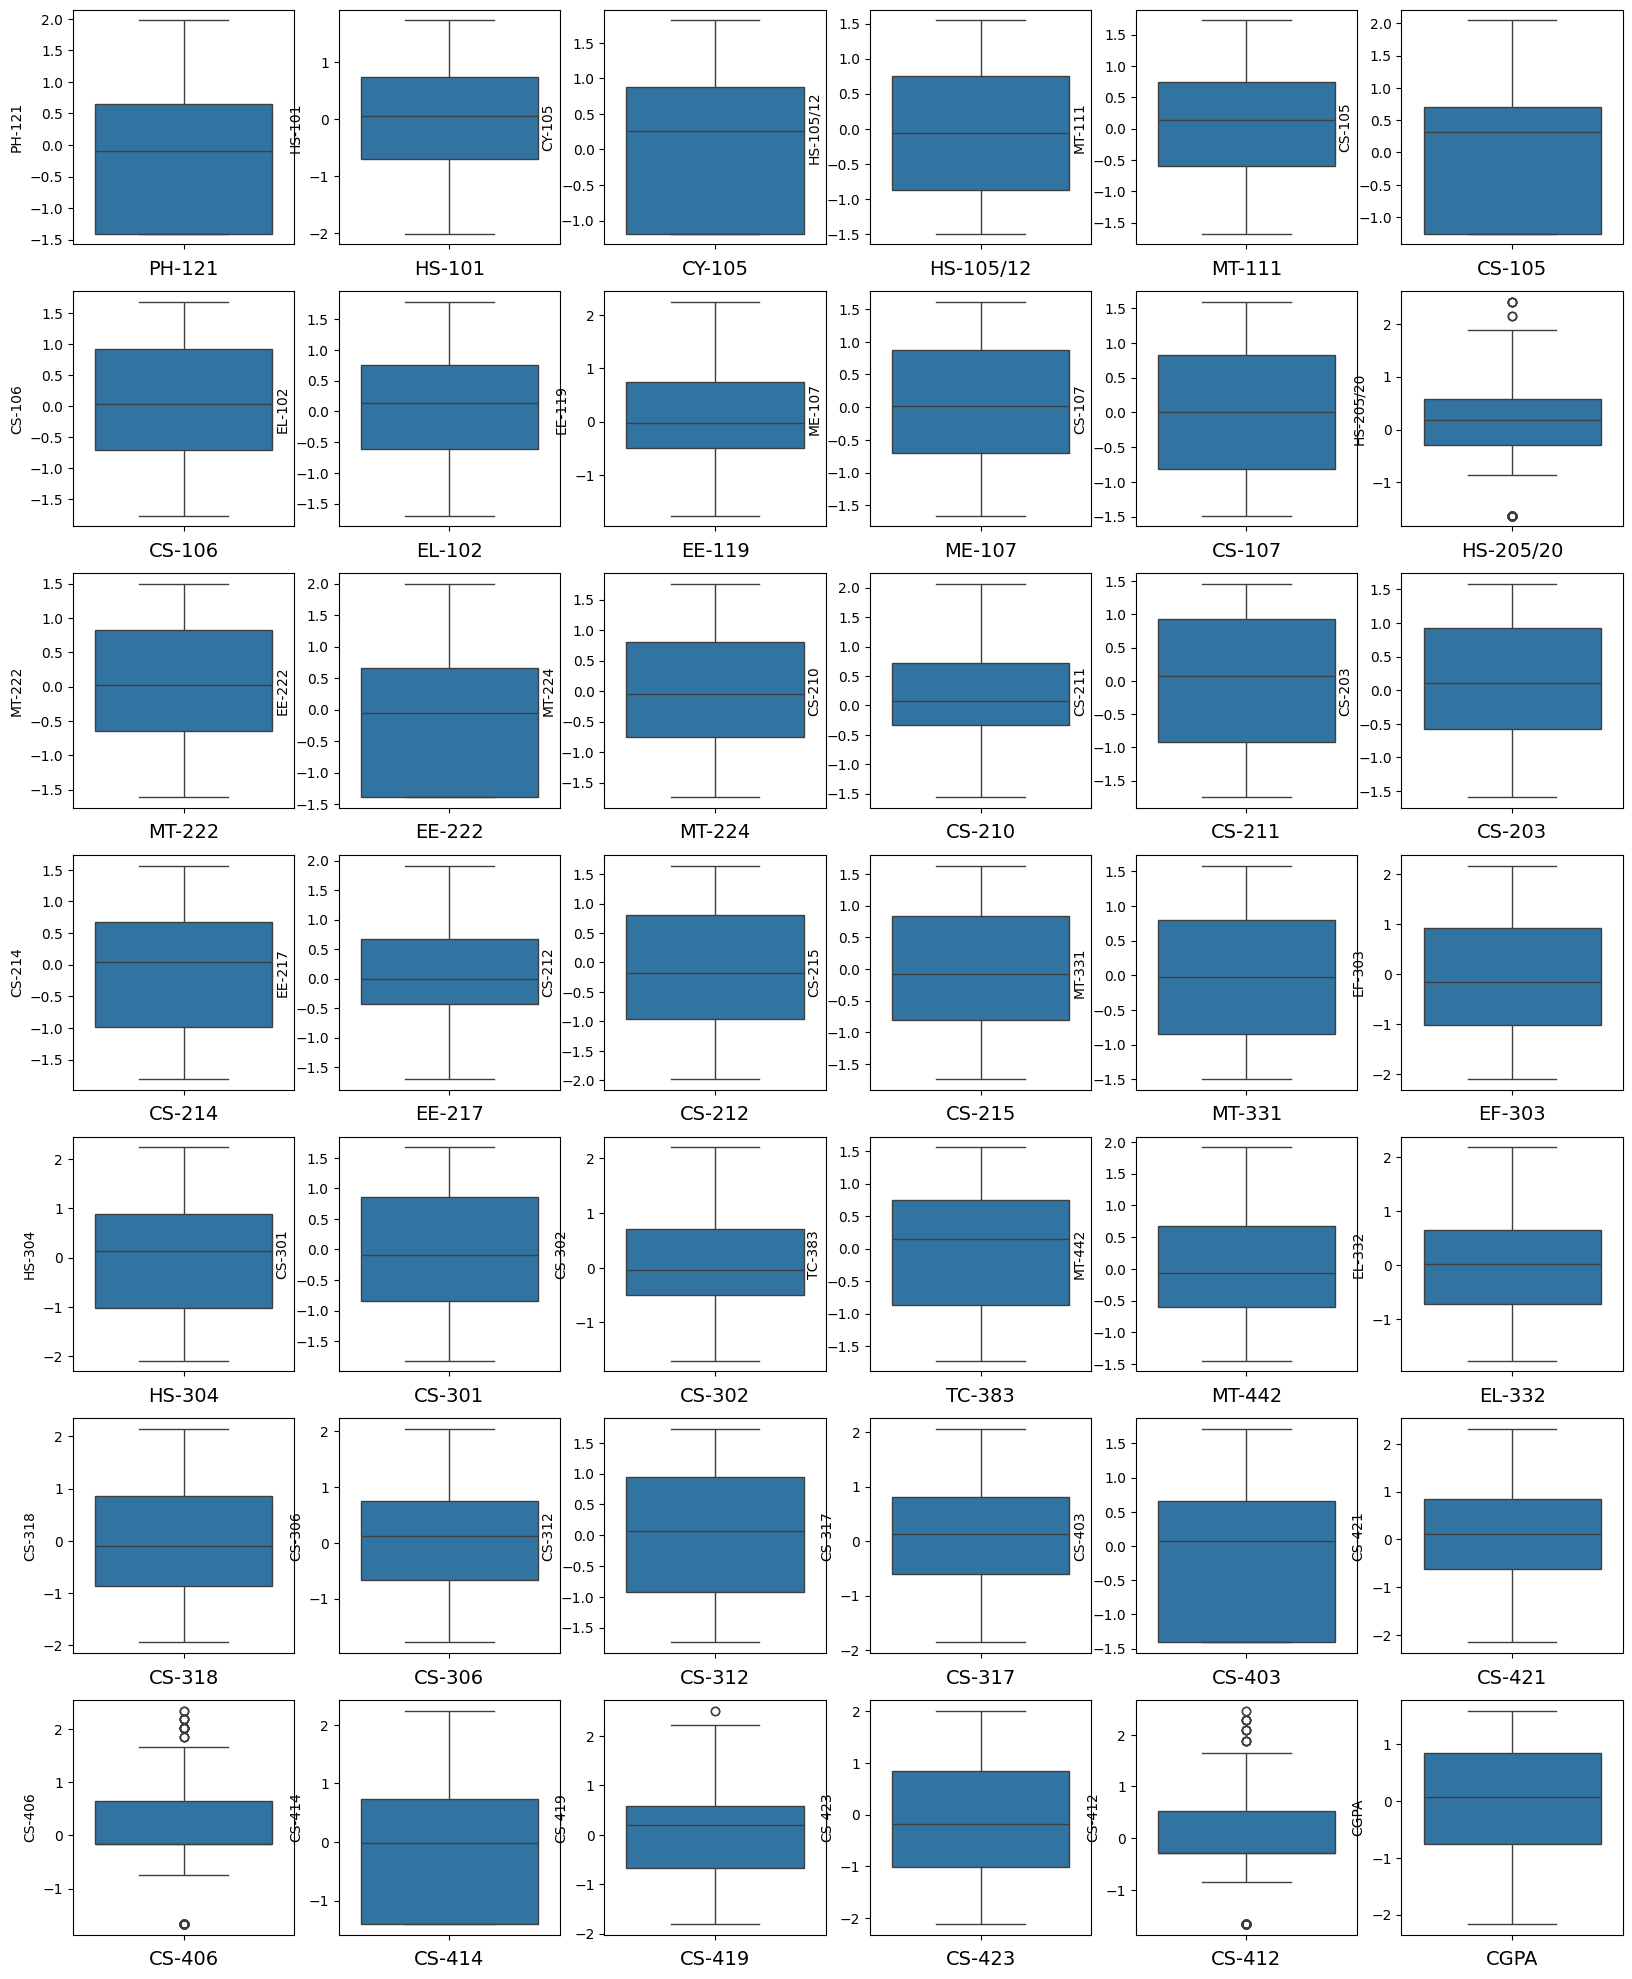

In [21]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 42:
        ax = plt.subplot(7,6,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize = 14)
    plotnumber += 1
plt.show()

In [22]:
df.skew()

PH-121      -0.063292
HS-101      -0.132650
CY-105       0.025768
HS-105/12   -0.120065
MT-111      -0.113142
CS-105       0.015641
CS-106      -0.106056
EL-102      -0.109015
EE-119      -0.059619
ME-107      -0.157666
CS-107      -0.103428
HS-205/20   -0.051015
MT-222      -0.157542
EE-222      -0.041795
MT-224      -0.141858
CS-210      -0.075589
CS-211      -0.203664
CS-203      -0.141914
CS-214      -0.200608
EE-217      -0.058216
CS-212      -0.092961
CS-215      -0.163688
MT-331      -0.105730
EF-303      -0.111932
HS-304      -0.020974
CS-301      -0.127547
CS-302      -0.072145
TC-383      -0.190124
MT-442      -0.036916
EL-332      -0.107137
CS-318      -0.071836
CS-306      -0.086486
CS-312      -0.207608
CS-317      -0.148072
CS-403      -0.120192
CS-421      -0.126630
CS-406      -0.009122
CS-414      -0.049936
CS-419      -0.076969
CS-423      -0.067329
CS-412      -0.030526
CGPA        -0.272095
dtype: float64

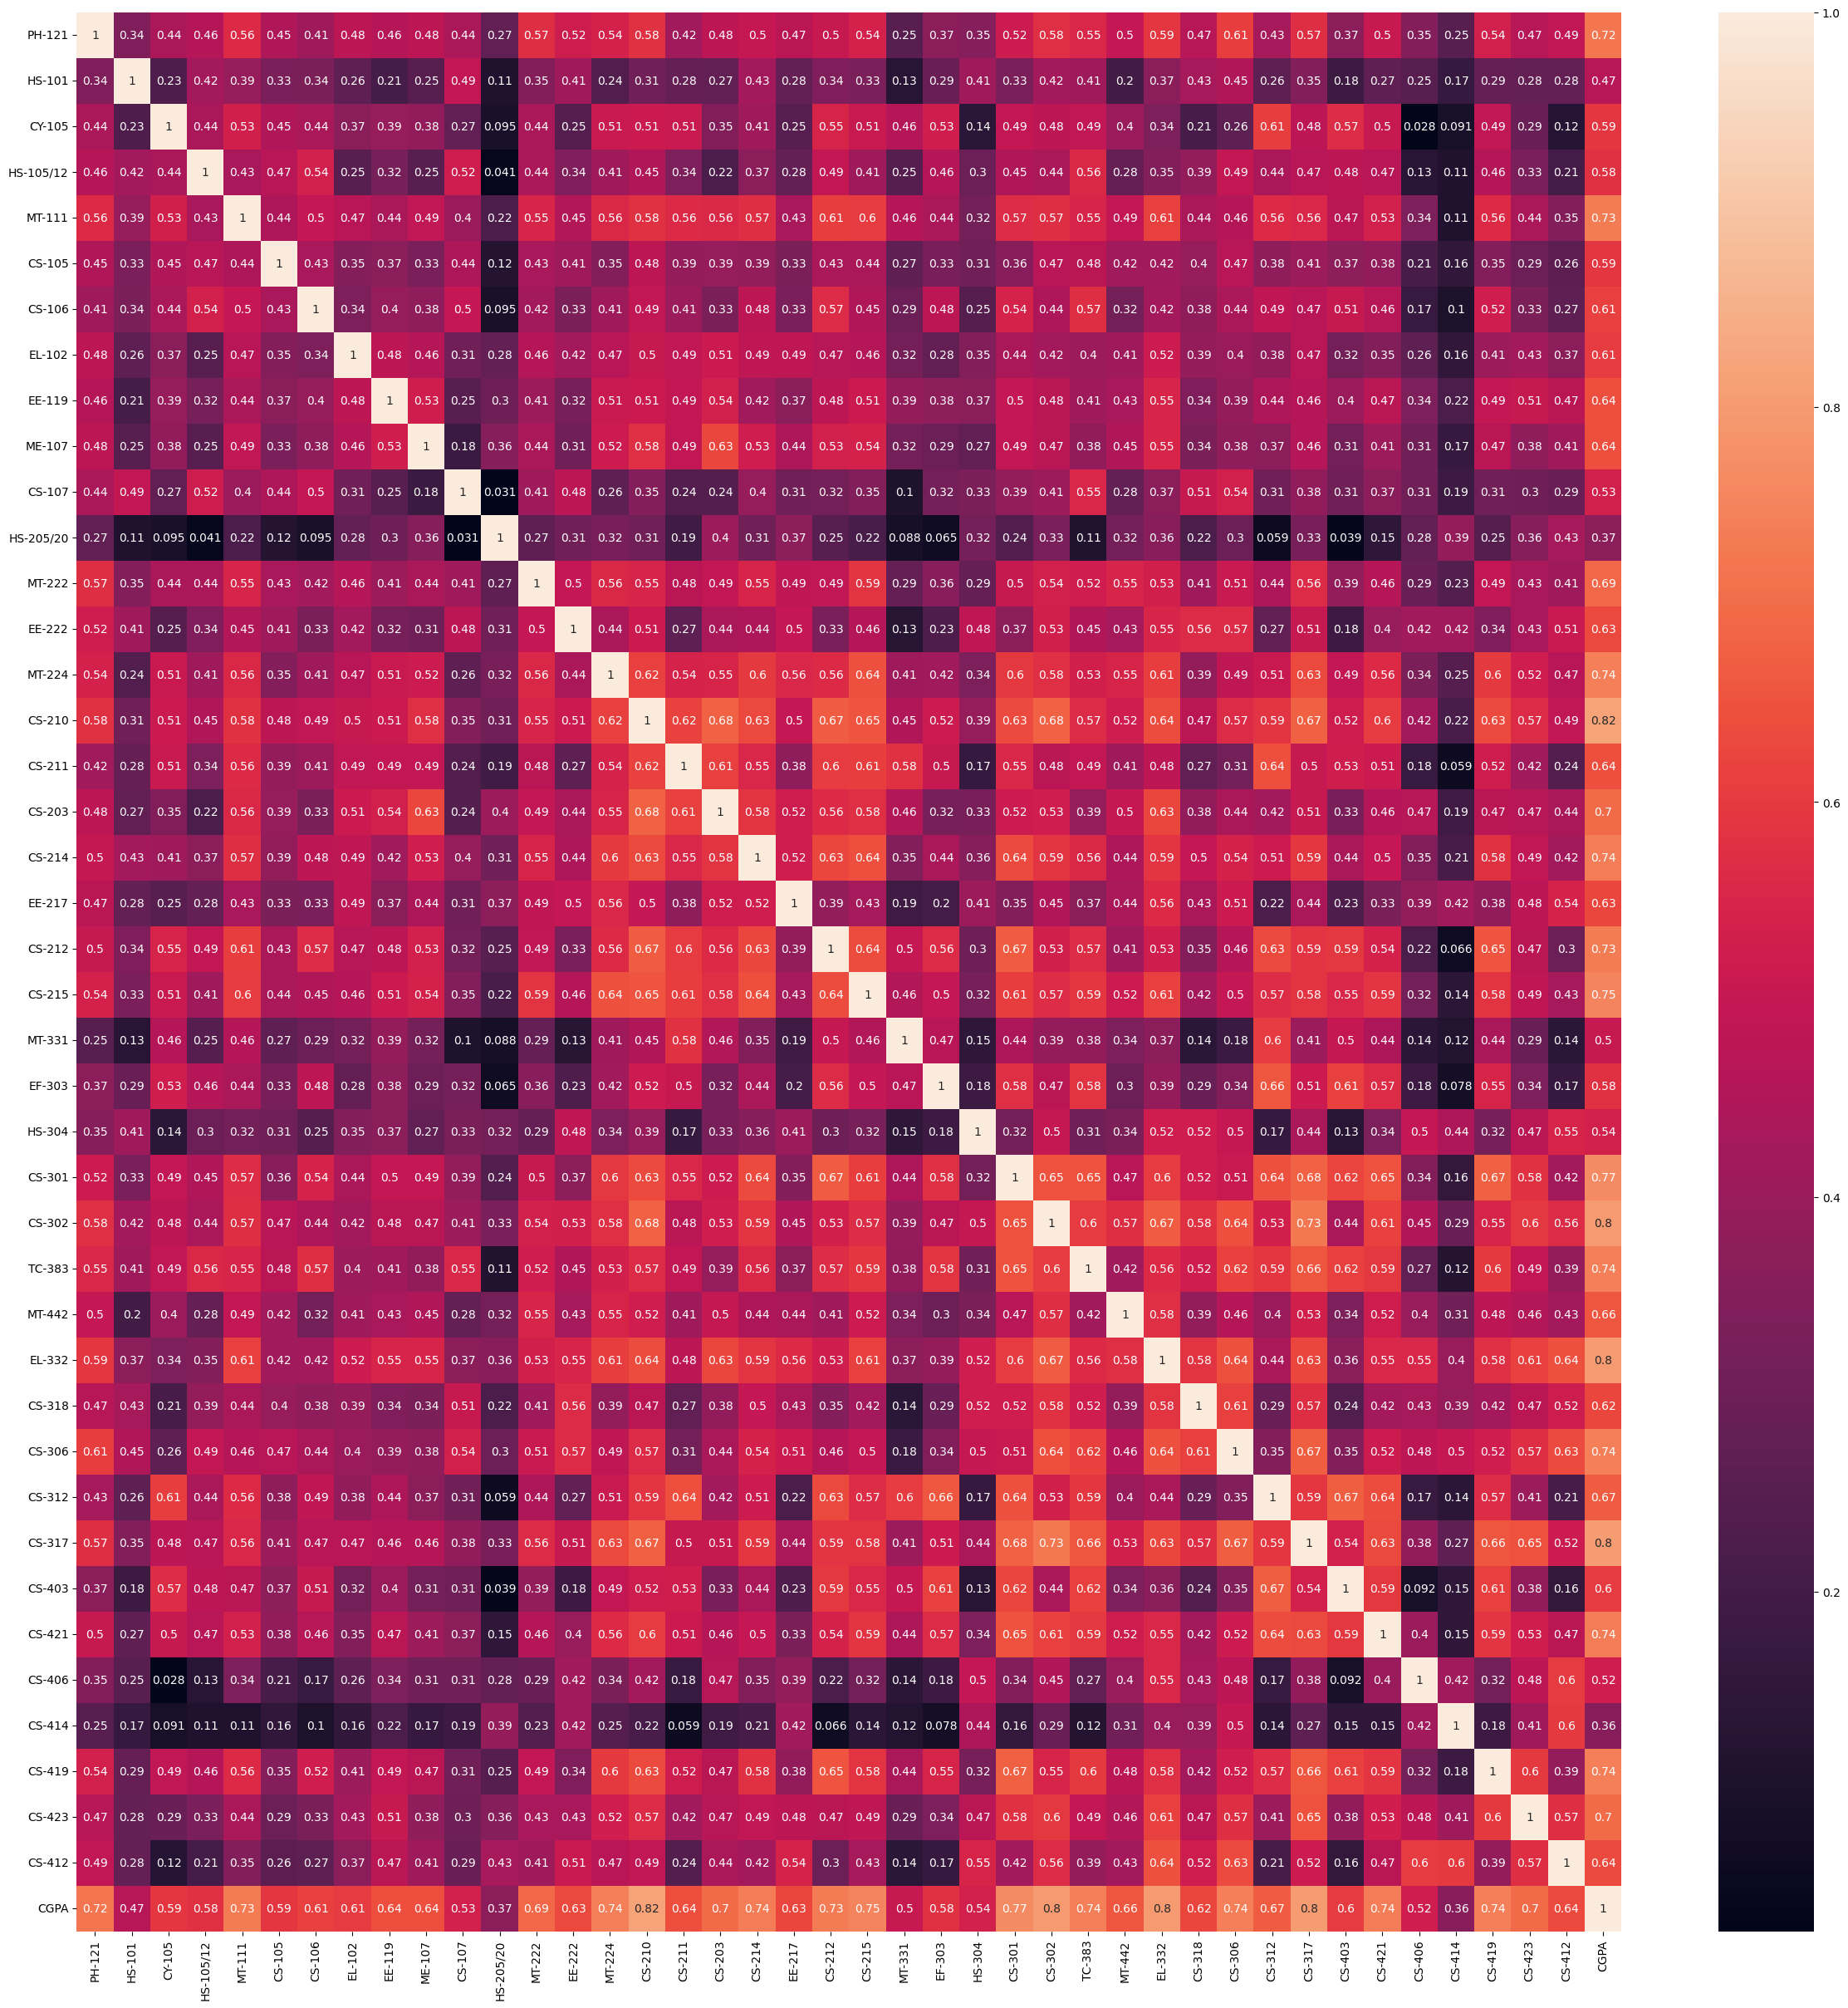

In [23]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr().abs(),annot = True)
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns = ['CGPA'],axis = 1)
y = df.CGPA

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['Score'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif

,Features,Score
0,PH-121,2.407474
1,HS-101,1.806236
2,CY-105,2.415842
3,HS-105/12,2.282051
4,MT-111,2.578459
5,CS-105,1.874763
6,CS-106,2.120399
7,EL-102,1.904783
8,EE-119,2.137776
9,ME-107,2.236418


All values are less than 5 which means low chances of multicollinearity

Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest,f_classif
best_features = SelectKBest(score_func = f_classif,k=41)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_features = pd.DataFrame(X.columns)
features = pd.concat([df_features,df_scores],axis = 1)
features.columns = ['Feature','Score']
print(features.nlargest(41,'Score'))

      Feature     Score
26     CS-302  4.106457
33     CS-317  3.638454
15     CS-210  3.445393
20     CS-212  3.142945
6      CS-106  3.050440
31     CS-306  2.925769
29     EL-332  2.862656
25     CS-301  2.778647
28     MT-442  2.747684
21     CS-215  2.689763
27     TC-383  2.669883
14     MT-224  2.580177
38     CS-419  2.568375
0      PH-121  2.529795
8      EE-119  2.425022
39     CS-423  2.418418
16     CS-211  2.415768
18     CS-214  2.325553
34     CS-403  2.229469
4      MT-111  2.161104
35     CS-421  2.079067
22     MT-331  1.977837
30     CS-318  1.962342
17     CS-203  1.880166
9      ME-107  1.845945
7      EL-102  1.842619
24     HS-304  1.626062
32     CS-312  1.602708
2      CY-105  1.579629
12     MT-222  1.547700
5      CS-105  1.510724
40     CS-412  1.503432
23     EF-303  1.454290
3   HS-105/12  1.425048
1      HS-101  1.407229
11  HS-205/20  1.394879
13     EE-222  1.372952
10     CS-107  1.343393
36     CS-406  1.317693
19     EE-217  1.220837
37     CS-414  1

In [26]:
X_scaled = X

In [27]:
X_scaled

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.929999,1.722942,1.583992,0.753575,1.264387,2.043319,1.434352,1.294449,0.742836,1.129062,...,0.757896,0.938455,1.126920,1.335670,0.852924,-0.163727,-1.397996,1.609423,-0.572128,-0.283122
1,-1.408599,1.402865,1.815696,1.367363,0.456289,1.454907,1.434352,-1.693712,2.245406,1.373058,...,1.569306,1.470592,1.444259,0.901910,1.218721,-0.163727,1.028556,0.943561,0.526419,0.161678
2,-1.408599,-0.699084,-1.186867,0.511870,0.142699,-1.259183,0.352182,0.142486,-0.498953,-0.694541,...,-0.663905,-0.563586,-0.595221,-1.409278,0.117176,-1.664513,-1.397996,-1.807685,-1.006608,-1.657296
3,1.800926,0.742068,1.815696,1.367363,1.502401,0.310095,1.671436,1.294449,1.977842,0.873408,...,1.313879,1.470592,0.469738,1.711182,0.852924,0.941100,0.397165,1.284288,0.848828,1.412835
4,-0.094494,-1.099528,0.253830,0.242872,-1.678218,-1.259183,-0.711570,0.142486,-1.764134,-0.694541,...,-0.663905,0.076052,-0.226658,0.379068,-0.253171,-0.163727,-1.397996,-0.664875,-1.006608,-1.657296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.310291,-2.006197,-1.186867,-0.422753,-1.066930,-1.259183,-0.711570,-0.611302,-1.048550,0.010874,...,0.117982,-0.914471,-0.982884,-1.409278,-2.149054,-1.664513,0.738002,0.201364,-0.572128,-1.657296
567,-0.619917,-2.006197,-1.186867,-1.498007,-1.678218,-1.259183,-1.760137,-0.611302,-1.764134,-1.657742,...,-0.663905,-0.235292,-0.226658,-1.409278,-2.149054,-0.163727,0.397165,-0.664875,0.526419,-0.283122
568,0.310291,-2.006197,0.253830,0.242872,-1.678218,-1.259183,-1.760137,-1.693712,-1.764134,-0.323139,...,0.117982,-0.914471,-0.595221,-1.409278,-0.625540,-1.664513,1.283022,0.201364,-1.006608,-0.283122
569,-1.408599,-0.318705,1.706068,-1.498007,1.502401,2.043319,0.352182,1.294449,0.742836,1.129062,...,0.117982,1.208029,-0.595221,0.065506,0.852924,1.844551,1.283022,-0.211287,0.185482,1.150284


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
import xgboost as xgb
from sklearn.svm import SVR

In [29]:
maxAcc = 0
maxRS = 0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print('We get Maximum Accuracy = ',maxAcc,' at random state = ', maxRS)

We get Maximum Accuracy =  0.9764782585002372  at random state =  106


In [30]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state = maxRS)

In [31]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr_test = lr.predict(x_test)
pred_lr_train = lr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_lr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_lr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_lr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_lr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_lr_test)))

R2 SCORE ON TESTING DATA  0.9764782585002372
R2 SCORE ON TRAINING DATA  0.9736678744236866
MEAN ABSOLUTE ERROR  0.12627775002823924
MEAN SQUARED ERROR  0.02451573608432215
ROOT MEAN SQUARED ERROR  0.3553558076467011


In [32]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
pred_ada_test = ada.predict(x_test)
pred_ada_train = ada.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_ada_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_ada_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_ada_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_ada_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_ada_test)))

R2 SCORE ON TESTING DATA  0.922231599080697
R2 SCORE ON TRAINING DATA  0.9590285788207868
MEAN ABSOLUTE ERROR  0.22537974187042922
MEAN SQUARED ERROR  0.08105478043182376
ROOT MEAN SQUARED ERROR  0.4747417633518556


In [33]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb_test = gb.predict(x_test)
pred_gb_train = gb.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_gb_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_gb_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_gb_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_gb_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_gb_test)))

R2 SCORE ON TESTING DATA  0.9652124833560813
R2 SCORE ON TRAINING DATA  0.9985500315042889
MEAN ABSOLUTE ERROR  0.14152474304025262
MEAN SQUARED ERROR  0.03625758650055208
ROOT MEAN SQUARED ERROR  0.376197744597509


In [34]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb_test = xgb.predict(x_test)
pred_xgb_train = xgb.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_xgb_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_xgb_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_xgb_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_xgb_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_xgb_test)))

R2 SCORE ON TESTING DATA  0.9373714876662703
R2 SCORE ON TRAINING DATA  0.9999994567529553
MEAN ABSOLUTE ERROR  0.18713324537673323
MEAN SQUARED ERROR  0.06527510217485029
ROOT MEAN SQUARED ERROR  0.43258900283841384


In [35]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr_test = rfr.predict(x_test)
pred_rfr_train = rfr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_rfr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_rfr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_rfr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_rfr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_rfr_test)))

R2 SCORE ON TESTING DATA  0.9543924756280997
R2 SCORE ON TRAINING DATA  0.9930310254269966
MEAN ABSOLUTE ERROR  0.16148657834460522
MEAN SQUARED ERROR  0.047534832017947115
ROOT MEAN SQUARED ERROR  0.401853926625839


In [36]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_dt_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_dt_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_dt_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_dt_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_dt_test)))

R2 SCORE ON TESTING DATA  0.7860719466413847
R2 SCORE ON TRAINING DATA  1.0
MEAN ABSOLUTE ERROR  0.36454470455002286
MEAN SQUARED ERROR  0.22296834174567792
ROOT MEAN SQUARED ERROR  0.6037753759056615


In [37]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn_test = knn.predict(x_test)
pred_knn_train = knn.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_knn_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_knn_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_knn_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_knn_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_knn_test)))

R2 SCORE ON TESTING DATA  0.9782394106377087
R2 SCORE ON TRAINING DATA  0.9773683047596415
MEAN ABSOLUTE ERROR  0.1160234209408631
MEAN SQUARED ERROR  0.022680160219030646
ROOT MEAN SQUARED ERROR  0.34062210870826204


In [38]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso_test = lasso.predict(x_test)
pred_lasso_train = lasso.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_lasso_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_lasso_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_lasso_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_lasso_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_lasso_test)))

R2 SCORE ON TESTING DATA  -0.018664237614914647
R2 SCORE ON TRAINING DATA  0.0
MEAN ABSOLUTE ERROR  0.8840083905013271
MEAN SQUARED ERROR  1.0617115066992953
ROOT MEAN SQUARED ERROR  0.9402172038956356


In [39]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pred_ridge_test = ridge.predict(x_test)
pred_ridge_train = ridge.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_ridge_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_ridge_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_ridge_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_ridge_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_ridge_test)))

R2 SCORE ON TESTING DATA  0.976509318814762
R2 SCORE ON TRAINING DATA  0.9736671085884835
MEAN ABSOLUTE ERROR  0.1262216845934388
MEAN SQUARED ERROR  0.02448336320608124
ROOT MEAN SQUARED ERROR  0.3552769125533473


In [40]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr_test = etr.predict(x_test)
pred_etr_train = etr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_etr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_etr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_etr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_etr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_etr_test)))

R2 SCORE ON TESTING DATA  0.9645114637373811
R2 SCORE ON TRAINING DATA  1.0
MEAN ABSOLUTE ERROR  0.14337102608726757
MEAN SQUARED ERROR  0.036988230188739896
ROOT MEAN SQUARED ERROR  0.37864366637680286


In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
score = cross_val_score(lr,X_scaled,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_lr_test) - score.mean())

[0.95595309 0.97179121 0.96985499 0.96552409 0.95143536]
0.9629117489442404
Difference between R2 score and cross validation score is:  0.013566509555996809


In [43]:
score1 = cross_val_score(ada,X_scaled,y)
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_ada_test) - score1.mean())

[0.89802748 0.90691398 0.91032623 0.92366248 0.90049985]
0.9078860005592608
Difference between R2 score and cross validation score is:  0.014345598521436131


In [44]:
score2 = cross_val_score(gb,X_scaled,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_gb_test) - score2.mean())

[0.94443858 0.96221128 0.96439679 0.96923282 0.96313522]
0.9606829397846669
Difference between R2 score and cross validation score is:  0.0045295435714144405


In [45]:
score3 = cross_val_score(xgb,X_scaled,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_xgb_test) - score3.mean())

[0.92547968 0.92413272 0.92302254 0.93955262 0.93910471]
0.9302584534355447
Difference between R2 score and cross validation score is:  0.007113034230725623


In [46]:
score4 = cross_val_score(rfr,X_scaled,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_rfr_test) - score4.mean())

[0.93962095 0.92750702 0.95115471 0.9613005  0.94525179]
0.9449669963814132
Difference between R2 score and cross validation score is:  0.009425479246686463


In [47]:
score5 = cross_val_score(dt,X_scaled,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_dt_test) - score5.mean())

[0.79952919 0.87636629 0.85648872 0.79955333 0.81870386]
0.8301282767993639
Difference between R2 score and cross validation score is:  -0.04405633015797916


In [48]:
score6 = cross_val_score(knn,X_scaled,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_knn_test) - score6.mean())

[0.9616259  0.97561016 0.97442456 0.96736179 0.95581527]
0.9669675360670912
Difference between R2 score and cross validation score is:  0.011271874570617513


In [49]:
score7 = cross_val_score(lasso,X_scaled,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_lasso_test) - score7.mean())

[-0.00316171 -0.00706201 -0.00820531 -0.01950102 -0.00854087]
-0.009294182125644168
Difference between R2 score and cross validation score is:  -0.009370055489270479


In [50]:
score8 = cross_val_score(ridge,X_scaled,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_ridge_test) - score8.mean())

[0.95611603 0.97181605 0.96995043 0.96559285 0.95159588]
0.9630142465171131
Difference between R2 score and cross validation score is:  0.013495072297648902


In [51]:
score9 = cross_val_score(etr,X_scaled,y)
print(score9)
print(score9.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_etr_test) - score9.mean())

[0.94841959 0.94753142 0.95945691 0.97287959 0.94580744]
0.9548189918696994
Difference between R2 score and cross validation score is:  0.009692471867681629


Difference is least for decision tree Regressor so it is our best fitted model.

In [52]:
help(dt)

Help on DecisionTreeRegressor in module sklearn.tree._classes object:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's impro

In [58]:
param_grid = {
    'min_samples_split':range(5,10),
    'min_samples_leaf':range(10,15)
    
    
}

In [59]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_leaf': range(10, 15),
                         'min_samples_split': range(5, 10)})

In [60]:
grid_search.best_estimator_

DecisionTreeRegressor(min_samples_leaf=11, min_samples_split=9)

In [62]:
grid_search.best_params_

{'min_samples_leaf': 11, 'min_samples_split': 9}

In [63]:
grid_search.best_score_

0.74913221046276

In [64]:
final_model = grid_search.best_estimator_

In [65]:
import joblib
joblib.dump(final_model,"Student Grade Prediction Project.pkl")

['Student Grade Prediction Project.pkl']

In [67]:
model = joblib.load("Student Grade Prediction Project.pkl")
pred = model.predict(x_test)
pred

array([-0.44246503,  0.96559867,  0.684065  ,  1.48448845, -1.31882417,
        0.3314721 ,  0.01052956,  0.74126088, -0.25522113,  0.28071258,
       -1.77751609,  0.01052956,  1.48448845,  1.37090521, -0.57501984,
        0.28071258,  1.20464951, -1.31882417, -0.84355506,  0.53672095,
        0.16084411, -0.84355506, -1.31882417, -1.22102135, -1.31882417,
       -0.84355506,  1.48448845, -0.44246503, -1.77751609, -0.57501984,
        1.48448845,  1.37090521,  1.48448845,  1.37090521, -0.44246503,
       -1.77751609, -0.84355506, -0.44246503,  1.48448845,  1.20464951,
        1.37090521, -0.57501984,  0.28071258,  1.20464951, -0.84355506,
        1.20464951,  0.16084411,  0.3314721 , -1.77751609, -1.77751609,
        0.3314721 ,  0.74126088,  0.3314721 , -0.47957078,  0.74126088,
        0.684065  , -1.31882417,  1.48448845,  0.684065  , -1.22102135,
        0.3314721 , -1.31882417, -1.22102135, -0.44246503, -1.77751609,
       -1.22102135,  0.74126088, -1.22102135, -0.57501984, -0.44

In [68]:
model.score(x_test,y_test)

0.8060712371990361